## Table of Contents
* [Introduction](#introduction)
    * [What is Bias?](#what_is_bias)
    * [Specific Bias Examples](#specific_bias_examples)
    * [Noticing and Solving Bias Problems](#solving_bias_problems)
* [Importing Libraries](#importing_libraries)
* [Confirmation Bias](#confirmation_bias)
* [Sampling Bias](#sampling_bias)
    * [Setting weights](#setting_weights)
* [Survivorship Bias](#survivorship_bias)
* [Conclusion](#conclusion)

# Introduction <a class="anchor" id="introduction"></a>

Bias is a pervasive issue in data science that can lead to inaccurate results and flawed conclusions. My project will explore the concept of bias in data sets, list specific biases, and discuss how to notice and solve problems these biases can cause.

### What is Bias? <a class="anchor" id="what_is_bias"></a>

Bias referse to the presence of systematic errors in data that can skew the results of an analysis. These errors can arise from various sources, such as the data collection process, the data itself, or the analysis methods used. Biases can manifest in different forms, such as selection bias, confirmation bias, or sampling bias, to name a few.

### Specific Bias Examples <a class="anchor" id="specific_bias_examples"></a>

Some specific biases that can occur in data sets are the following:
- **Confirmation Bias:** Occurs when the analysis is designed to confirm pre-existing beliefs or hypotheses.


- **Sampling Bias:** Occurs when some members of the intended population are less likely to be included than others. As a result, our sample is not representative of our population.


### Noticing and Solving Bias Problems <a class="anchor" id="solving_bias_problems"></a>

To notice and solve problems caused by biases in data sets, it is important to take the following steps:
- **Identify where the bias is coming from:** Determine the source of bias, such as the data collection process or the analysis methods used.

- **Collect diverse data:** Collect data from diverse sources to make sure that the analysis is not skewed towards a specific group or perspective.

- **Check for bias regularly:** Regularly check for bias throughout the analysis process to ensure that the results are accurate and as unbiased as it can be.

In the following sections I will show how we can identify some sort of biases and some solutions to solve the problems these biases can cause.

# Importing Libraries <a class="anchor" id="importing_libraries"></a>

In [9]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confirmation Bias <a class="anchor" id="confirmation_bias"></a>

Confirmation bias occurs when a specific belief or hypothees are overrepresented in our dataset.

It is often unintentional but still can lead to poor decision-making in our research.

For representation, I have chose a Tripadvisor dataset featuring hotel reviews categorized into ratings review by review.

In [10]:
# [https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews]
review_data = pd.read_csv('tripadvisor_hotel_reviews.csv')

review_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


For easier understanding, let's create a sentiment column where we describe whether a review was positive or negative ratings-wise. According to my beliefs, if a scale of rating goes from 1 to 5 a 4 or higher grade should be considered as a positive review, while the others are rather negative.

In [11]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'
    
review_data['Sentiment'] = review_data['Rating'].apply(categorize_sentiment)

review_data.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Negative
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


Let's check the reviews' distribution:

In [12]:
print('Reviews distribution:', review_data['Sentiment'].value_counts(normalize=True))

Reviews distribution: Positive    0.736567
Negative    0.263433
Name: Sentiment, dtype: float64


According to the distribution, positive reviews are kind of overrepresented, that could indicate the presence of confirmation bias. 

Confirmation bias itself does not necessarily mean that the data is invalid or unusable. However, it is important to mitigate its effects when analyzing the data or using it for predictions and such.

In [13]:
# example for a balanced dataset [https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/]
imdb_data = pd.read_csv('IMDB Dataset.csv')

imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
print('Reviews distribution:', imdb_data['sentiment'].value_counts(normalize=True))

Reviews distribution: positive    0.5
negative    0.5
Name: sentiment, dtype: float64


The distrubution of positive and negative reviews are equal, that means the IMDB dataset is balanced an should be free of confirmation bias.

# Sampling Bias <a class="anchor" id="sampling_bias"></a>

Sampling bias occurs when some members of a population are systematically more likely to be selected in a sample than others.
<br>
Let's go through an example of it:

Let's say we want to find the average weight of an English adult. By doing interviews for surveying people about their weight, we just happened to interview a lot more females than males. This would not be truly representative of the actual population as by sampling the collected data we would highly likely get a value smaller than expected, considering that the average female weight is lesser.

We've unintenionnally introduced some sampling bias by biasing our selection towards females.

According to a 2019 study, the average weight of an English female was 72.1 kilograms and male was 85.4 kilograms.
Standard deviation of female and male weights are 11 and 15 kilograms.

Let's assume we interviewed 6000 females and 2500 males.

Let's plot our data:

In [23]:
female_weights = np.random.normal(loc=72.1, scale=11, size=6250)
male_weights = np.random.normal(loc=85.4, scale=15, size=2500)

all_weights = np.append(female_weights, male_weights)
all_genders = ['F'] * 6250 + ['M'] * 2500

weight_df = pd.DataFrame({'Gender': all_genders, 'Weight': all_weights})
weight_df

,Gender,Weight
0,F,76.823648
1,F,78.271820
2,F,74.423818
3,F,86.295361
4,F,66.150590
...,...,...
8745,M,77.826088
8746,M,87.673175
8747,M,79.869414
8748,M,122.271350


Let's plot our current distribution:

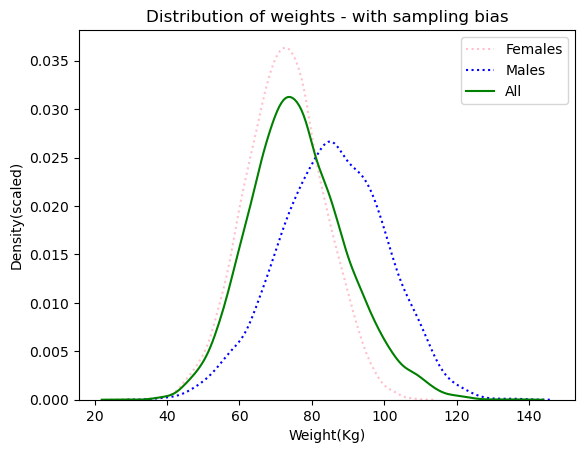

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.figure()
sns.distplot(pd.Series(female_weights, name = "Weight(Kg)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(male_weights, name = "Weight(Kg)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(all_weights, hist = False, label = "All", 
             color = 'green')

plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of weights - with sampling bias')
plt.legend();

As we can see, the 'all' distribution follows the 'Females' distribution way closer than it should.

### Setting weights <a class="anchor" id="setting_weights"></a>

Setting so-called 'weights' to the observation can solve this error. If we consider males as a weight of 1, females should be considered as 2500/6250 = 0.4

In [25]:
def set_weight(row):
    if row['Gender'] == 'F':
        row['Weight_correction'] = 0.25
    else:
        row['Weight_correction'] = 1
    return row

df_with_weights = weight_df.apply(set_weight, axis = 1)
df_with_weights.head()

,Gender,Weight,Weight_correction
0,F,76.823648,0.25
1,F,78.271820,0.25
2,F,74.423818,0.25
3,F,86.295361,0.25
4,F,66.150590,0.25


Pandas features a so-called 'sample' method which can be used to extract sub-samples of a dataframe yielding a more representative one for our measurements.

In [32]:
sample = df_with_weights.sample(n=2000, weights='Weight_correction')
print('Number of males: ', sample[sample.Gender == 'M'].shape[0])
print('Number of females: ', sample[sample.Gender == 'F'].shape[0])

Number of males:  1104
Number of females:  896


Let's try distributing our sample distribution:

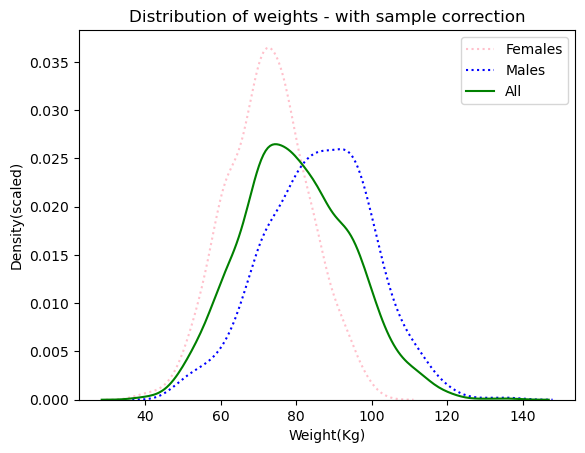

In [33]:
plt.figure()
sns.distplot(pd.Series(sample[sample.Gender == 'F'].Weight, name = "Weight(Kg)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(sample[sample.Gender == 'M'].Weight, name = "Weight(Kg)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(sample.Weight, hist = False, label = "All", 
             color = 'green')

plt.gca().set_xlabel('Weight(Kg)')
plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of weights - with sample correction')
plt.legend();

There is many more aspects to consider, apart from gender we could also weight our observations on age, state or income for example.

### Survivorship bias  <a class="anchor" id="survivorship_bias"></a>

Survivorship bias occurs when an analysis only considers the data that survived a particular process, ignoring the data that did not.

In a classic example of survivorship bias, researchers during World War II were examining the returned American bomber planes to determine which areas needed reinforcement based on observed damage. 

However, an engineer realized that the worst-hit planes never came back. The initial research, which exclusively analyzed data from the returning planes, led to a misleading assessment due to the inherent survivorship bias.

As a coding example,

### Conclusion  <a class="anchor" id="conclusion"></a>

In conclusion, it is important to check for bias in our datasets regularly as our research can include them even in an unintentional way to skew the results of our analysis.

While the presence of bias in our analyses is not inherently harmful, it is crucial to acknowledge the potential alterations it can introduce to our results. Being aware of bias allows us to assess its impact and, when necessary, implement mitigation strategies to ensure the accuracy and reliability of our findings.